In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
### First we will take LifeExpectancy dataset to understand the data. 
### It has 10 columns comprising of the different readings of each patient.

life_expectancy = pd.read_csv('LifeExpectancy.csv')

In [3]:
life_expectancy.info

<bound method DataFrame.info of           Country  Year      Status  Life expectancy  Adult Mortality  \
0     Afghanistan  2015  Developing             65.0            263.0   
1     Afghanistan  2014  Developing             59.9            271.0   
2     Afghanistan  2013  Developing             59.9            268.0   
3     Afghanistan  2012  Developing             59.5            272.0   
4     Afghanistan  2011  Developing             59.2            275.0   
...           ...   ...         ...              ...              ...   
2933     Zimbabwe  2004  Developing             44.3            723.0   
2934     Zimbabwe  2003  Developing             44.5            715.0   
2935     Zimbabwe  2002  Developing             44.8             73.0   
2936     Zimbabwe  2001  Developing             45.3            686.0   
2937     Zimbabwe  2000  Developing             46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  \
0            

In [4]:
life_expectancy.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
life_expectancy.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [6]:
life_expectancy.shape

(2938, 22)

In [7]:
life_expectancy.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.234717,164.725664,30.303948,4.546875,738.251295,83.022124,2419.592240,38.381178,42.035739,82.617767,5.924098,82.393125,1.742103,6611.523863,1.023085e+07,4.821886,4.852144,0.630362,12.009837
std,4.613841,9.509115,124.086215,117.926501,3.921946,1987.914858,22.996984,11467.272489,19.935375,160.445548,23.367166,2.400770,23.655562,5.077785,13296.603449,5.402242e+07,4.397621,4.485854,0.205140,3.265139
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.755000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


dataframe = []

for column in life_expectancy.columns:
    unique_values = life_expectancy[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print(f"Number of unique values in '{column}': {len(unique_values)}\n")
    
results_df = pd.DataFrame(results, columns=['Column Name', 'Unique Values', 'Count of Unique Values'])

# Display the DataFrame with unique values and counts
print(display(results_df))

choose either one

In [8]:
# Create a list to store the results for each column
results = []

# Iterate through columns and store unique values and counts
for column in life_expectancy.columns:
    unique_values = life_expectancy[column].unique()
    unique_count = len(unique_values)
    results.append([column, unique_values, unique_count])

# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['Column Name', 'Unique Values', 'Count of Unique Values'])

# Display the DataFrame with unique values and counts
print(display(results_df))

,Column Name,Unique Values,Count of Unique Values
0,Country,"[Afghanistan, Albania, Algeria, Angola, Antigu...",193
1,Year,"[2015, 2014, 2013, 2012, 2011, 2010, 2009, 200...",16
2,Status,"[Developing, Developed]",2
3,Life expectancy,"[65.0, 59.9, 59.5, 59.2, 58.8, 58.6, 58.1, 57....",362
4,Adult Mortality,"[263.0, 271.0, 268.0, 272.0, 275.0, 279.0, 281...",425
5,infant deaths,"[62, 64, 66, 69, 71, 74, 77, 80, 82, 84, 85, 8...",209
6,Alcohol,"[0.01, 0.03, 0.02, 4.6, 4.51, 4.76, 5.14, 5.37...",1077
7,percentage expenditure,"[71.27962362, 73.52358168, 73.21924272, 78.184...",2328
8,Hepatitis B,"[65.0, 62.0, 64.0, 67.0, 68.0, 66.0, 63.0, 99....",87
9,Measles,"[1154, 492, 430, 2787, 3013, 1989, 2861, 1599,...",958


None


In [9]:
null_count = life_expectancy.isnull().sum().sum()
null_count

0

In [10]:
outliers = {}

# Loop through each column in the dataframe
for column in life_expectancy.columns:
    if life_expectancy[column].dtype != object:  # Exclude non-numeric columns
        # Calculate the IQR (Interquartile Range)
        Q1 = life_expectancy[column].quantile(0.25)
        Q3 = life_expectancy[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find and store the outliers for the column
        column_outliers = life_expectancy[(life_expectancy[column] < lower_bound) | (life_expectancy[column] > upper_bound)]
        outliers[column] = column_outliers

# Print or analyze the outliers for each column
for column, outlier_data in outliers.items():
    print(f"Outliers in {column} column:")
    print(display(outlier_data))

# You can also decide what you want to do with the outliers, whether it's removing them or further analysis.


Outliers in Year column:


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling


None
Outliers in Life expectancy column:


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1127,Haiti,2010,Developing,36.3,682.0,23,5.76,36.292918,92.0,0,...,66.0,8.90,66.0,1.9,662.279518,9999617.0,4.0,4.0,0.470,8.6
1484,Lesotho,2005,Developing,44.5,675.0,5,2.67,57.903698,87.0,0,...,88.0,6.30,89.0,34.8,862.946312,1949543.0,9.3,9.2,0.437,10.7
1582,Malawi,2003,Developing,44.6,613.0,43,1.08,4.375316,84.0,167,...,85.0,6.35,84.0,24.2,26.152517,12336687.0,7.6,7.5,0.362,10.3
1583,Malawi,2002,Developing,44.0,67.0,46,1.10,3.885395,64.0,92,...,79.0,4.82,64.0,24.7,29.979898,1213711.0,7.7,7.6,0.388,10.4
1584,Malawi,2001,Developing,43.5,599.0,48,1.15,12.797606,92.0,150,...,86.0,5.70,9.0,25.1,146.761540,11695863.0,7.9,7.7,0.387,10.1
1585,Malawi,2000,Developing,43.1,588.0,51,1.18,13.762702,92.0,304,...,73.0,6.70,75.0,25.5,153.259487,11376172.0,8.0,7.9,0.391,10.7
2306,Sierra Leone,2006,Developing,44.3,464.0,30,3.80,38.000758,92.0,33,...,65.0,1.68,64.0,2.2,322.313468,5848692.0,9.1,9.1,0.348,8.0
2307,Sierra Leone,2005,Developing,43.3,48.0,30,3.83,42.088929,92.0,29,...,67.0,12.25,65.0,2.2,287.689194,5658379.0,9.3,9.3,0.341,7.8
2308,Sierra Leone,2004,Developing,42.3,496.0,30,3.99,38.524548,92.0,7,...,69.0,11.66,65.0,2.1,263.145817,5439695.0,9.5,9.5,0.332,7.6
2309,Sierra Leone,2003,Developing,41.5,57.0,30,4.07,38.614732,92.0,586,...,66.0,11.69,73.0,1.9,263.761831,5199549.0,9.7,9.8,0.322,7.4


None
Outliers in Adult Mortality column:


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
345,Botswana,2006,Developing,54.8,491.0,2,6.45,76.318679,93.0,6,...,96.0,4.93,96.0,14.4,5374.554867,1884238.0,9.6,9.4,0.610,11.9
346,Botswana,2005,Developing,51.7,566.0,2,6.37,629.842564,92.0,5,...,96.0,5.62,96.0,20.6,5351.253732,1855852.0,1.0,9.9,0.593,11.9
347,Botswana,2004,Developing,48.1,652.0,2,4.90,469.582390,91.0,1,...,96.0,5.56,96.0,28.4,4896.583835,182933.0,1.5,1.4,0.580,11.8
348,Botswana,2003,Developing,46.4,693.0,2,5.51,299.367125,9.0,59,...,96.0,4.65,96.0,31.9,4163.659600,184339.0,1.9,1.8,0.567,11.8
349,Botswana,2002,Developing,46.0,699.0,2,6.41,6.330007,88.0,7,...,97.0,6.47,97.0,34.6,355.618382,1779953.0,11.4,11.3,0.558,11.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932,Zimbabwe,2005,Developing,44.6,717.0,28,4.14,8.717409,65.0,420,...,69.0,6.44,68.0,30.3,444.765750,129432.0,9.0,9.0,0.406,9.3
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


None
Outliers in infant deaths column:


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2789,United Republic of Tanzania,2004,Developing,51.5,454.0,100,3.81,0.000000,95.0,1419,...,95.0,4.10,95.0,10.8,1766.947595,1386542.0,7.8,7.8,0.677,12.3
2790,United Republic of Tanzania,2003,Developing,58.0,459.0,103,2.34,0.000000,95.0,1673,...,97.0,4.60,95.0,11.5,1766.947595,1386542.0,7.9,7.9,0.677,12.3
2791,United Republic of Tanzania,2002,Developing,52.0,46.0,106,3.37,0.000000,89.0,5131,...,91.0,3.59,89.0,12.1,1766.947595,1386542.0,8.0,8.0,0.677,12.3
2792,United Republic of Tanzania,2001,Developing,49.6,46.0,110,4.09,0.000000,92.0,11847,...,65.0,3.28,87.0,12.5,1766.947595,1386542.0,8.2,8.1,0.677,12.3


None
Outliers in Alcohol column:


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
228,Belarus,2011,Developing,72.0,232.0,0,17.31,846.911307,98.0,50,...,98.0,4.92,98.0,0.1,6519.71753,9473172.0,2.0,2.1,0.787,15.5
873,Estonia,2008,Developing,74.2,167.0,0,16.99,225.072362,94.0,0,...,95.0,6.60,95.0,0.1,1894.54850,13379.0,2.0,2.1,0.835,16.1
874,Estonia,2007,Developing,73.0,189.0,0,17.87,1904.124690,95.0,1,...,95.0,5.16,95.0,0.1,16586.45200,13468.0,2.0,2.1,0.829,16.1


None
Outliers in percentage expenditure column:


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
65,Antigua and Barbuda,2014,Developing,76.2,131.0,0,8.56,2422.999774,99.0,0,...,96.0,5.54,99.0,0.2,12888.29667,1386542.0,3.3,3.3,0.782,13.9
66,Antigua and Barbuda,2013,Developing,76.1,133.0,0,8.58,1991.430372,99.0,0,...,98.0,5.33,99.0,0.2,12224.86416,1386542.0,3.3,3.3,0.781,13.9
67,Antigua and Barbuda,2012,Developing,75.9,134.0,0,8.18,2156.229842,98.0,0,...,97.0,5.39,98.0,0.2,12565.44197,1386542.0,3.3,3.3,0.778,13.8
68,Antigua and Barbuda,2011,Developing,75.7,136.0,0,7.84,1810.875316,99.0,0,...,99.0,5.65,99.0,0.1,11929.34991,1386542.0,3.3,3.3,0.782,14.1
69,Antigua and Barbuda,2010,Developing,75.6,138.0,0,7.84,1983.956937,98.0,0,...,99.0,5.63,98.0,0.1,12126.87614,1386542.0,3.3,3.3,0.783,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2757,United Arab Emirates,2004,Developing,75.1,95.0,1,1.77,2972.448675,92.0,22,...,94.0,2.46,94.0,0.1,36161.17610,1386542.0,5.2,4.9,0.813,12.4
2759,United Arab Emirates,2002,Developing,74.7,11.0,1,1.72,2598.842827,92.0,53,...,94.0,2.72,94.0,0.1,31311.35936,1386542.0,5.3,5.0,0.803,12.1
2815,Uruguay,2010,Developing,76.3,118.0,0,6.21,2331.532804,95.0,0,...,95.0,8.63,95.0,0.1,11938.21200,3374415.0,1.5,1.5,0.777,15.6
2816,Uruguay,2009,Developing,76.6,118.0,0,6.67,1871.736563,95.0,0,...,95.0,8.78,95.0,0.1,9415.17386,3362755.0,1.5,1.5,0.774,15.5


None
Outliers in Hepatitis B column:


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
40,Algeria,2007,Developing,73.8,129.0,20,0.440,320.323924,9.0,0,...,95.0,3.820,95.0,0.1,3935.183343,34376.0,6.0,5.9,0.690,12.3
41,Algeria,2006,Developing,73.4,132.0,20,0.360,270.240196,8.0,944,...,95.0,3.360,95.0,0.1,3464.617900,33777915.0,6.1,6.0,0.686,12.3
87,Argentina,2008,Developing,75.4,126.0,10,8.410,1413.735430,9.0,0,...,94.0,6.660,93.0,0.1,8953.359275,4382389.0,1.0,0.9,0.792,16.3
111,Armenia,2000,Developing,72.0,142.0,1,2.900,32.756269,55.0,15,...,96.0,6.250,93.0,0.1,622.742748,369588.0,2.1,2.2,0.639,11.2
142,Austria,2001,Developed,78.6,92.0,0,12.400,3582.848308,44.0,0,...,83.0,1.120,84.0,0.1,24489.735530,842293.0,1.7,1.9,0.837,15.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2905,Yemen,2000,Developing,68.0,252.0,48,0.070,0.000000,14.0,0,...,74.0,4.140,74.0,0.1,1766.947595,1386542.0,14.1,14.1,0.436,7.7
2906,Zambia,2015,Developing,61.8,33.0,27,3.755,0.000000,9.0,9,...,9.0,5.755,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5
2914,Zambia,2007,Developing,52.6,487.0,32,2.080,10.851482,8.0,535,...,77.0,4.370,8.0,13.6,114.587985,12725974.0,6.9,6.8,0.492,11.1
2927,Zimbabwe,2010,Developing,52.4,527.0,29,5.210,53.308581,9.0,9696,...,89.0,5.370,89.0,15.7,713.635620,1486317.0,7.1,7.0,0.436,10.0


None
Outliers in Measles column:


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,Zambia,2001,Developing,44.6,611.0,43,2.61,46.830275,92.0,16997,...,86.0,6.56,85.0,18.6,378.273624,1824125.0,7.4,7.4,0.424,9.8
2921,Zambia,2000,Developing,43.8,614.0,44,2.62,45.616880,92.0,30930,...,85.0,7.16,85.0,18.7,341.955625,1531221.0,7.5,7.5,0.418,9.6
2927,Zimbabwe,2010,Developing,52.4,527.0,29,5.21,53.308581,9.0,9696,...,89.0,5.37,89.0,15.7,713.635620,1486317.0,7.1,7.0,0.436,10.0
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5


None
Outliers in BMI column:


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling


None
Outliers in under-five deaths  column:


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790,United Republic of Tanzania,2003,Developing,58.0,459.0,103,2.34,0.000000,95.0,1673,...,97.0,4.60,95.0,11.5,1766.947595,1386542.0,7.9,7.9,0.677,12.3
2791,United Republic of Tanzania,2002,Developing,52.0,46.0,106,3.37,0.000000,89.0,5131,...,91.0,3.59,89.0,12.1,1766.947595,1386542.0,8.0,8.0,0.677,12.3
2792,United Republic of Tanzania,2001,Developing,49.6,46.0,110,4.09,0.000000,92.0,11847,...,65.0,3.28,87.0,12.5,1766.947595,1386542.0,8.2,8.1,0.677,12.3
2793,United Republic of Tanzania,2000,Developing,49.2,457.0,114,3.89,0.000000,92.0,14649,...,64.0,2.64,79.0,12.8,1766.947595,1386542.0,8.3,8.3,0.677,12.3


None
Outliers in Polio column:


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.010,71.279624,65.0,1154,...,6.0,8.160,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
11,Afghanistan,2004,Developing,57.0,293.0,87,0.020,15.296066,67.0,466,...,5.0,8.790,5.0,0.1,219.141353,24118979.0,19.5,19.7,0.381,6.8
12,Afghanistan,2003,Developing,56.7,295.0,87,0.010,11.089053,65.0,798,...,41.0,8.820,41.0,0.1,198.728544,2364851.0,19.7,19.9,0.373,6.5
13,Afghanistan,2002,Developing,56.2,3.0,88,0.010,16.887351,64.0,2486,...,36.0,7.760,36.0,0.1,187.845950,21979923.0,19.9,2.2,0.341,6.2
14,Afghanistan,2001,Developing,55.3,316.0,88,0.010,10.574728,63.0,8762,...,35.0,7.800,33.0,0.1,117.496980,2966463.0,2.1,2.4,0.340,5.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906,Zambia,2015,Developing,61.8,33.0,27,3.755,0.000000,9.0,9,...,9.0,5.755,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5
2909,Zambia,2012,Developing,59.2,349.0,29,2.590,196.915250,78.0,896,...,7.0,4.910,78.0,5.6,1734.936120,14699937.0,6.5,6.3,0.554,12.3
2911,Zambia,2010,Developing,58.0,363.0,30,2.470,184.364910,83.0,15754,...,8.0,4.410,83.0,6.8,1463.213573,138533.0,6.7,6.5,0.533,11.8
2913,Zambia,2008,Developing,55.7,45.0,31,2.120,153.678375,87.0,140,...,9.0,4.870,87.0,11.9,1369.682490,1382517.0,6.8,6.7,0.504,11.4


None
Outliers in Total expenditure column:


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
663,Cuba,2009,Developing,78.1,11.0,1,4.01,818.877102,96.0,0,...,99.0,11.78,96.0,0.1,5484.776300,1386542.0,3.4,3.2,0.782,17.7
742,Denmark,2010,Developed,79.2,84.0,0,10.28,954.486593,92.0,5,...,9.0,11.80,9.0,0.1,5841.411220,5547683.0,1.1,0.9,0.906,16.8
1384,Kiribati,2009,Developing,65.2,28.0,0,0.54,162.290371,86.0,0,...,84.0,12.24,86.0,0.1,1297.285141,1568.0,0.1,0.1,0.576,11.9
1385,Kiribati,2008,Developing,65.1,21.0,0,0.46,167.620155,83.0,0,...,74.0,12.23,82.0,0.1,1413.323400,9844.0,0.2,0.1,0.572,11.6
1386,Kiribati,2007,Developing,65.0,211.0,0,0.68,188.710877,96.0,0,...,93.0,13.66,94.0,0.1,1357.632211,96311.0,0.2,0.1,0.574,11.8
1478,Lesotho,2011,Developing,52.3,52.0,4,2.39,195.825251,96.0,172,...,95.0,11.79,96.0,10.5,1352.384330,264166.0,6.8,6.6,0.469,11.0
1495,Liberia,2010,Developing,59.7,272.0,9,3.64,41.910524,47.0,2200,...,71.0,11.87,7.0,1.8,327.425970,3948125.0,7.4,7.2,0.403,9.6
1496,Liberia,2009,Developing,59.2,277.0,10,3.75,5.592170,64.0,6,...,84.0,14.39,81.0,2.1,33.667491,3811528.0,7.6,7.4,0.400,9.7
1497,Liberia,2008,Developing,58.6,281.0,10,3.88,40.033441,64.0,1,...,79.0,11.83,75.0,2.4,232.617320,3662993.0,7.7,7.6,0.394,9.8
1573,Malawi,2012,Developing,55.3,42.0,31,0.01,82.768659,96.0,11,...,95.0,12.60,96.0,8.3,374.518820,169735.0,6.6,6.5,0.454,10.7


None
Outliers in Diphtheria column:


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
11,Afghanistan,2004,Developing,57.0,293.0,87,0.020,15.296066,67.0,466,...,5.0,8.790,5.0,0.1,219.141353,24118979.0,19.5,19.7,0.381,6.8
12,Afghanistan,2003,Developing,56.7,295.0,87,0.010,11.089053,65.0,798,...,41.0,8.820,41.0,0.1,198.728544,2364851.0,19.7,19.9,0.373,6.5
13,Afghanistan,2002,Developing,56.2,3.0,88,0.010,16.887351,64.0,2486,...,36.0,7.760,36.0,0.1,187.845950,21979923.0,19.9,2.2,0.341,6.2
14,Afghanistan,2001,Developing,55.3,316.0,88,0.010,10.574728,63.0,8762,...,35.0,7.800,33.0,0.1,117.496980,2966463.0,2.1,2.4,0.340,5.9
15,Afghanistan,2000,Developing,54.8,321.0,88,0.010,10.424960,62.0,6532,...,24.0,8.200,24.0,0.1,114.560000,293756.0,2.3,2.5,0.338,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2865,Venezuela (Bolivarian Republic of),2008,Developing,73.2,168.0,9,8.180,0.000000,53.0,0,...,76.0,3.980,5.0,0.1,1766.947595,1386542.0,1.6,1.5,0.745,13.4
2872,Venezuela (Bolivarian Republic of),2001,Developing,72.5,169.0,10,8.050,0.000000,53.0,115,...,87.0,5.210,7.0,0.1,1766.947595,1386542.0,1.8,1.7,0.672,10.4
2906,Zambia,2015,Developing,61.8,33.0,27,3.755,0.000000,9.0,9,...,9.0,5.755,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5
2914,Zambia,2007,Developing,52.6,487.0,32,2.080,10.851482,8.0,535,...,77.0,4.370,8.0,13.6,114.587985,12725974.0,6.9,6.8,0.492,11.1


None
Outliers in  HIV/AIDS column:


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
48,Angola,2015,Developing,52.4,335.0,66,3.755,0.000000,64.0,118,...,7.0,5.755,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
49,Angola,2014,Developing,51.7,348.0,67,8.330,23.965612,64.0,11699,...,68.0,3.310,64.0,2.0,479.312240,2692466.0,8.5,8.3,0.527,11.4
50,Angola,2013,Developing,51.1,355.0,69,8.100,35.958573,77.0,8523,...,67.0,4.260,77.0,2.3,484.616884,2599834.0,8.6,8.5,0.523,11.4
51,Angola,2012,Developing,56.0,358.0,72,8.240,256.122524,75.0,4458,...,75.0,3.300,75.0,2.6,4598.249988,259615.0,8.8,8.6,0.508,10.3
52,Angola,2011,Developing,51.0,361.0,75,8.060,239.891392,72.0,1449,...,73.0,3.380,71.0,2.5,4299.128890,24218565.0,8.9,8.8,0.495,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.360,0.000000,68.0,31,...,67.0,7.130,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.060,0.000000,7.0,998,...,7.0,6.520,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.430,0.000000,73.0,304,...,73.0,6.530,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.720,0.000000,76.0,529,...,76.0,6.160,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


None
Outliers in GDP column:


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,3.755,0.000000,99.0,0,...,86.0,5.755,99.0,0.2,13566.95410,1386542.0,3.3,3.3,0.784,13.9
65,Antigua and Barbuda,2014,Developing,76.2,131.0,0,8.560,2422.999774,99.0,0,...,96.0,5.540,99.0,0.2,12888.29667,1386542.0,3.3,3.3,0.782,13.9
66,Antigua and Barbuda,2013,Developing,76.1,133.0,0,8.580,1991.430372,99.0,0,...,98.0,5.330,99.0,0.2,12224.86416,1386542.0,3.3,3.3,0.781,13.9
67,Antigua and Barbuda,2012,Developing,75.9,134.0,0,8.180,2156.229842,98.0,0,...,97.0,5.390,98.0,0.2,12565.44197,1386542.0,3.3,3.3,0.778,13.8
68,Antigua and Barbuda,2011,Developing,75.7,136.0,0,7.840,1810.875316,99.0,0,...,99.0,5.650,99.0,0.1,11929.34991,1386542.0,3.3,3.3,0.782,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2810,Uruguay,2015,Developing,77.0,116.0,0,3.755,0.000000,95.0,0,...,95.0,5.755,95.0,0.1,15524.84247,3431552.0,1.5,1.4,0.794,15.5
2811,Uruguay,2014,Developing,76.8,117.0,0,6.030,463.639782,95.0,0,...,95.0,8.580,95.0,0.1,16737.89827,3419546.0,1.5,1.4,0.791,15.5
2812,Uruguay,2013,Developing,76.8,117.0,0,5.820,482.803945,94.0,0,...,94.0,8.680,94.0,0.1,16881.25680,3485.0,1.5,1.4,0.788,15.5
2814,Uruguay,2011,Developing,77.0,111.0,0,5.970,417.911744,95.0,0,...,95.0,8.550,95.0,0.1,14166.49980,3385624.0,1.5,1.5,0.780,15.5


None
Outliers in Population column:


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
11,Afghanistan,2004,Developing,57.0,293.0,87,0.02,15.296066,67.0,466,...,5.0,8.79,5.0,0.1,219.141353,24118979.0,19.5,19.7,0.381,6.8
13,Afghanistan,2002,Developing,56.2,3.0,88,0.01,16.887351,64.0,2486,...,36.0,7.76,36.0,0.1,187.845950,21979923.0,19.9,2.2,0.341,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2931,Zimbabwe,2006,Developing,45.4,7.0,28,4.57,34.262169,68.0,212,...,71.0,5.12,7.0,26.8,414.796232,13124267.0,8.6,8.6,0.408,9.5
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


None
Outliers in thinness  1-19 years column:


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,Viet Nam,2004,Developing,74.2,136.0,29,2.86,0.000000,94.0,217,...,96.0,5.90,96.0,0.2,1766.947595,1386542.0,15.4,16.1,0.601,11.0
2886,Viet Nam,2003,Developing,74.0,137.0,30,2.19,0.000000,78.0,2297,...,96.0,4.84,99.0,0.2,1766.947595,1386542.0,15.6,16.2,0.592,10.9
2887,Viet Nam,2002,Developing,73.8,137.0,30,2.03,0.000000,92.0,6755,...,92.0,4.70,75.0,0.2,1766.947595,1386542.0,15.6,16.3,0.584,10.7
2888,Viet Nam,2001,Developing,73.6,138.0,32,1.84,0.000000,92.0,12058,...,96.0,5.17,96.0,0.1,1766.947595,1386542.0,15.7,16.4,0.576,10.6


None
Outliers in thinness 5-9 years column:


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,Viet Nam,2004,Developing,74.2,136.0,29,2.86,0.000000,94.0,217,...,96.0,5.90,96.0,0.2,1766.947595,1386542.0,15.4,16.1,0.601,11.0
2886,Viet Nam,2003,Developing,74.0,137.0,30,2.19,0.000000,78.0,2297,...,96.0,4.84,99.0,0.2,1766.947595,1386542.0,15.6,16.2,0.592,10.9
2887,Viet Nam,2002,Developing,73.8,137.0,30,2.03,0.000000,92.0,6755,...,92.0,4.70,75.0,0.2,1766.947595,1386542.0,15.6,16.3,0.584,10.7
2888,Viet Nam,2001,Developing,73.6,138.0,32,1.84,0.000000,92.0,12058,...,96.0,5.17,96.0,0.1,1766.947595,1386542.0,15.7,16.4,0.576,10.6


None
Outliers in Income composition of resources column:


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
74,Antigua and Barbuda,2005,Developing,74.6,147.0,0,8.15,1455.608186,99.0,0,...,98.0,4.41,99.0,0.1,11371.938950,1386542.0,3.5,3.4,0.0,0.0
75,Antigua and Barbuda,2004,Developing,74.4,149.0,0,7.28,22.862952,97.0,0,...,97.0,4.21,97.0,0.1,1352.837400,1386542.0,3.5,3.4,0.0,0.0
76,Antigua and Barbuda,2003,Developing,74.2,151.0,0,7.16,1158.065259,99.0,0,...,99.0,4.53,99.0,0.1,9739.825560,1386542.0,3.5,3.5,0.0,0.0
77,Antigua and Barbuda,2002,Developing,74.0,153.0,0,7.21,927.407585,99.0,0,...,93.0,4.41,98.0,0.1,9386.716452,1386542.0,3.6,3.5,0.0,0.0
78,Antigua and Barbuda,2001,Developing,73.8,154.0,0,7.51,163.767698,96.0,0,...,99.0,4.48,97.0,0.1,9358.154162,1386542.0,3.6,3.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,Vanuatu,2004,Developing,69.6,169.0,0,0.85,334.167337,63.0,0,...,67.0,4.12,69.0,0.1,1787.947230,24143.0,1.6,1.5,0.0,10.7
2854,Vanuatu,2003,Developing,69.4,173.0,0,1.20,27.298391,64.0,165,...,67.0,4.20,69.0,0.1,158.527240,198964.0,1.6,1.6,0.0,10.4
2855,Vanuatu,2002,Developing,69.3,176.0,0,1.24,171.137361,66.0,101,...,67.0,3.52,7.0,0.1,1353.934819,193956.0,1.7,1.6,0.0,10.2
2856,Vanuatu,2001,Developing,69.1,179.0,0,0.91,163.105292,68.0,7,...,67.0,3.37,7.0,0.1,1362.617310,18929.0,1.7,1.6,0.0,10.1


None
Outliers in Schooling column:


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
63,Angola,2000,Developing,45.3,48.0,97,1.850,15.881493,92.0,2219,...,3.0,2.790,28.0,2.0,555.296942,1644924.0,1.9,1.9,0.382,4.6
74,Antigua and Barbuda,2005,Developing,74.6,147.0,0,8.150,1455.608186,99.0,0,...,98.0,4.410,99.0,0.1,11371.938950,1386542.0,3.5,3.4,0.000,0.0
75,Antigua and Barbuda,2004,Developing,74.4,149.0,0,7.280,22.862952,97.0,0,...,97.0,4.210,97.0,0.1,1352.837400,1386542.0,3.5,3.4,0.000,0.0
76,Antigua and Barbuda,2003,Developing,74.2,151.0,0,7.160,1158.065259,99.0,0,...,99.0,4.530,99.0,0.1,9739.825560,1386542.0,3.5,3.5,0.000,0.0
77,Antigua and Barbuda,2002,Developing,74.0,153.0,0,7.210,927.407585,99.0,0,...,93.0,4.410,98.0,0.1,9386.716452,1386542.0,3.6,3.5,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2423,South Sudan,2001,Developing,49.6,381.0,30,3.755,0.000000,92.0,0,...,93.0,5.755,93.0,3.0,1766.947595,6974442.0,3.3,3.3,0.000,0.0
2424,South Sudan,2000,Developing,48.9,38.0,31,3.755,0.000000,92.0,0,...,93.0,5.755,93.0,2.7,1766.947595,67656.0,3.3,3.3,0.000,0.0
2616,Timor-Leste,2000,Developing,58.7,276.0,3,0.500,49.069672,92.0,0,...,93.0,3.260,93.0,0.1,422.286330,87167.0,12.2,12.2,0.000,0.0
2712,Turkmenistan,2000,Developing,63.8,224.0,7,2.900,88.243635,92.0,113,...,98.0,3.940,97.0,0.1,643.175180,4516131.0,3.6,3.6,0.000,0.0


None


outliers = {}

# Loop through each column in the dataframe
for column in life_expectancy.columns:
    if pd.api.types.is_numeric_dtype(life_expectancy[column]):
        # Calculate the IQR (Interquartile Range)
        Q1 = life_expectancy[column].quantile(0.25)
        Q3 = life_expectancy[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find and store the outliers for the column
        column_outliers = life_expectancy[(life_expectancy[column] < lower_bound) | (life_expectancy[column] > upper_bound)]
        outliers[column] = column_outliers

# Impute the mean values only for outliers in their respective columns
for column, outlier_data in outliers.items():
    for index, row in outlier_data.iterrows():
        for col_name, outlier_value in row.iteritems():
            if pd.api.types.is_numeric_dtype(row[col_name]) and (outlier_value < lower_bound or outlier_value > upper_bound):
                life_expectancy.at[index, col_name] = life_expectancy[col_name].mean()

# Print the DataFrame with mean values imputed for outliers in their respective columns
print(life_expectancy)

In [11]:
life_expectancy_continous = life_expectancy.select_dtypes(include=['number'])

# Display the new DataFrame with only numeric columns
display(life_expectancy_continous.head(5))

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [12]:
def replace_outliers_with_median(data, column_name):
    # Calculate the median for the specified column
    median = data[column_name].median()

    # Calculate the IQR (Interquartile Range)
    q1 = data[column_name].quantile(0.25)
    q3 = data[column_name].quantile(0.75)
    iqr = q3 - q1

    # Define the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Replace outliers with the median
    data[column_name] = np.where((data[column_name] < lower_bound) | (data[column_name] > upper_bound), median, data[column_name])

# Identify the column with outliers (e.g., 'Life Expectancy') and replace outliers with the median
column_names = ['Life expectancy','Adult Mortality','infant deaths','Alcohol','percentage expenditure','Hepatitis B','Measles','BMI','Polio','Total expenditure','Diphtheria','GDP','Population','thinness  1-19 years','thinness 5-9 years','Income composition of resources','Schooling']

for column_name in column_names:
    replace_outliers_with_median(life_expectancy, column_name)
    
# Replace with the name of your column


# Print the modified DataFrame
print(display(life_expectancy))


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,3.0,0.01,71.279624,65.0,17.0,...,93.0,8.16,65.0,0.1,584.259210,1386542.0,3.3,3.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,3.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,3.3,3.3,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,3.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,1386542.0,3.3,3.3,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,3.0,0.01,78.184215,67.0,17.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,3.3,3.3,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,3.0,0.01,7.097109,68.0,17.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,3.3,3.3,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,72.1,144.0,27.0,4.36,0.000000,68.0,31.0,...,67.0,7.13,65.0,33.6,454.366654,1386542.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,72.1,144.0,26.0,4.06,0.000000,92.0,17.0,...,93.0,6.52,68.0,36.7,453.351155,1386542.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,144.0,25.0,1.72,0.000000,76.0,529.0,...,76.0,6.16,75.0,42.1,548.587312,1386542.0,1.6,1.7,0.427,9.8


None


In [13]:
life_expectancy.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.403710,152.805990,8.059905,4.532953,147.419882,90.406399,70.735194,38.381178,42.035739,89.487406,5.786043,89.714091,1.742103,2032.767562,1.720022e+06,4.277332,4.291491,0.660318,12.195371
std,4.613841,9.295013,103.551548,12.754371,3.900447,227.749792,8.278288,158.299914,19.935375,160.445548,10.783820,2.152228,10.287456,5.077785,1968.993201,2.019180e+06,3.390476,3.421240,0.153925,2.850113
min,2000.000000,44.800000,1.000000,0.000000,0.010000,0.000000,61.000000,0.000000,1.000000,0.000000,51.000000,0.370000,51.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.253000,4.700000
25%,2004.000000,63.425000,74.000000,0.000000,1.092500,4.685343,89.000000,0.000000,19.400000,0.000000,86.000000,4.370000,86.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.554000,10.500000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.884537,92.000000,17.000000,43.500000,4.000000,93.000000,5.755000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.600000,218.000000,9.000000,7.380000,168.945236,96.000000,36.000000,56.100000,28.000000,97.000000,7.150000,97.000000,0.800000,2178.012010,1.386542e+06,6.600000,6.600000,0.772000,14.100000
max,2015.000000,89.000000,454.000000,55.000000,16.580000,1092.155356,99.000000,899.000000,87.300000,2500.000000,99.000000,11.710000,99.000000,50.600000,9985.369590,9.999617e+06,15.300000,15.500000,0.948000,19.700000


In [14]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Encode the 'Status' column
life_expectancy['Status'] = label_encoder.fit_transform(life_expectancy['Status'])

# Print the modified DataFrame
print(display(life_expectancy))


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,1,65.0,263.0,3.0,0.01,71.279624,65.0,17.0,...,93.0,8.16,65.0,0.1,584.259210,1386542.0,3.3,3.3,0.479,10.1
1,Afghanistan,2014,1,59.9,271.0,3.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,3.3,3.3,0.476,10.0
2,Afghanistan,2013,1,59.9,268.0,3.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,1386542.0,3.3,3.3,0.470,9.9
3,Afghanistan,2012,1,59.5,272.0,3.0,0.01,78.184215,67.0,17.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,3.3,3.3,0.463,9.8
4,Afghanistan,2011,1,59.2,275.0,3.0,0.01,7.097109,68.0,17.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,3.3,3.3,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,1,72.1,144.0,27.0,4.36,0.000000,68.0,31.0,...,67.0,7.13,65.0,33.6,454.366654,1386542.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,1,72.1,144.0,26.0,4.06,0.000000,92.0,17.0,...,93.0,6.52,68.0,36.7,453.351155,1386542.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,1,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,1,45.3,144.0,25.0,1.72,0.000000,76.0,529.0,...,76.0,6.16,75.0,42.1,548.587312,1386542.0,1.6,1.7,0.427,9.8


None


In [15]:
from sklearn.preprocessing import StandardScaler


# Columns to normalize
columns_to_normalize = ['Adult Mortality', 'BMI', 'GDP']

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the selected columns
life_expectancy[columns_to_normalize] = scaler.fit_transform(life_expectancy[columns_to_normalize])

# Print the modified DataFrame with normalized columns
sel_col=['Adult Mortality', 'BMI', 'GDP']
print(display(life_expectancy[sel_col]))


,Adult Mortality,BMI,GDP
0,1.064328,-0.967349,-0.735785
1,1.141597,-0.992434,-0.721340
2,1.112621,-1.017519,-0.711664
3,1.151256,-1.042605,-0.692253
4,1.180232,-1.062673,-1.000291
...,...,...,...
2933,-0.085054,-0.565984,-0.801765
2934,-0.085054,-0.586052,-0.802281
2935,-0.770820,-0.606120,-1.003434
2936,-0.085054,-0.626188,-0.753905


None


C:\Users\sohan\AppData\Local\Temp\ipykernel_32596\3929687779.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = life_expectancy.corr()


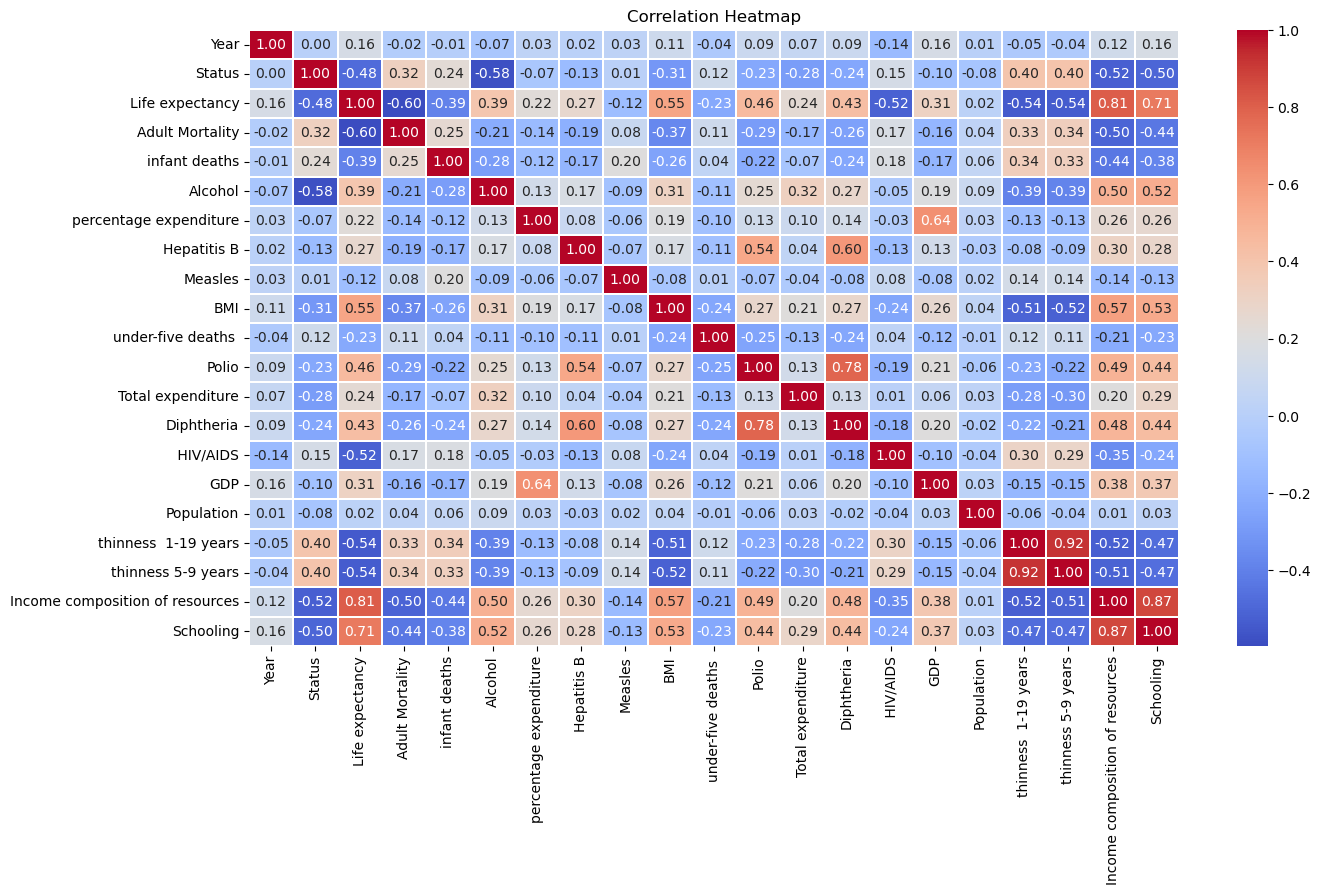

In [16]:


# Compute the correlation matrix
correlation_matrix = life_expectancy.corr()

# Plot the correlation heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.2)
plt.title("Correlation Heatmap")
plt.show()

# Analyze the heatmap and answer questions
# You can analyze the heatmap visually to answer specific questions about the relationships between features.


In [17]:
positive_corr_features = correlation_matrix['Life expectancy'].sort_values(ascending=False).index[1:]
display (positive_corr_features)

# (b) Features Most Negatively Correlated with the target variable
negative_corr_features = correlation_matrix['Life expectancy'].sort_values(ascending=True).index[1:]
display (negative_corr_features)

Index(['Income composition of resources', 'Schooling', 'BMI', 'Polio',
       'Diphtheria', 'Alcohol', 'GDP', 'Hepatitis B', 'Total expenditure',
       'percentage expenditure', 'Year', 'Population', 'Measles',
       'under-five deaths ', 'infant deaths', 'Status', ' HIV/AIDS',
       'thinness 5-9 years', 'thinness  1-19 years', 'Adult Mortality'],
      dtype='object')

Index(['thinness  1-19 years', 'thinness 5-9 years', ' HIV/AIDS', 'Status',
       'infant deaths', 'under-five deaths ', 'Measles', 'Population', 'Year',
       'percentage expenditure', 'Total expenditure', 'Hepatitis B', 'GDP',
       'Alcohol', 'Diphtheria', 'Polio', 'BMI', 'Schooling',
       'Income composition of resources', 'Life expectancy'],
      dtype='object')

target_variable = 'Life expectancy'
categorical_columns = ['Country', 'Status']
continuous_columns = [col for col in life_expectancy.columns if col != target_variable and col not in categorical_columns]
life_expectancy[continuous_columns] = life_expectancy[continuous_columns].mask(outliers, life_expectancy[continuous_columns][~outliers].mean())


In [18]:
life_expectancy

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,1,65.0,1.064328,3.0,0.01,71.279624,65.0,17.0,...,93.0,8.16,65.0,0.1,-0.735785,1386542.0,3.3,3.3,0.479,10.1
1,Afghanistan,2014,1,59.9,1.141597,3.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,-0.721340,327582.0,3.3,3.3,0.476,10.0
2,Afghanistan,2013,1,59.9,1.112621,3.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,-0.711664,1386542.0,3.3,3.3,0.470,9.9
3,Afghanistan,2012,1,59.5,1.151256,3.0,0.01,78.184215,67.0,17.0,...,67.0,8.52,67.0,0.1,-0.692253,3696958.0,3.3,3.3,0.463,9.8
4,Afghanistan,2011,1,59.2,1.180232,3.0,0.01,7.097109,68.0,17.0,...,68.0,7.87,68.0,0.1,-1.000291,2978599.0,3.3,3.3,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,1,72.1,-0.085054,27.0,4.36,0.000000,68.0,31.0,...,67.0,7.13,65.0,33.6,-0.801765,1386542.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,1,72.1,-0.085054,26.0,4.06,0.000000,92.0,17.0,...,93.0,6.52,68.0,36.7,-0.802281,1386542.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,1,44.8,-0.770820,25.0,4.43,0.000000,73.0,304.0,...,73.0,6.53,71.0,39.8,-1.003434,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,1,45.3,-0.085054,25.0,1.72,0.000000,76.0,529.0,...,76.0,6.16,75.0,42.1,-0.753905,1386542.0,1.6,1.7,0.427,9.8


In [19]:
life_expectancy = life_expectancy.drop('Country',axis=1)
X = life_expectancy.drop('Life expectancy', axis=1)
y = life_expectancy['Life expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
display(X_test)

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2546,2006,1,-0.287886,8.0,0.97,122.652333,83.0,517.0,0.507668,10,83.0,3.78,93.0,0.1,-0.137414,1386542.0,6.4,6.3,0.636,11.4
650,2006,0,-0.384473,0.0,11.83,64.912906,92.0,1.0,0.989306,0,96.0,6.95,96.0,0.1,-0.135026,444.0,1.8,1.8,0.783,13.9
1740,2007,1,-0.268569,0.0,4.98,678.518894,92.0,0.0,0.944152,0,92.0,6.74,92.0,0.1,1.993428,615875.0,2.1,2.2,0.762,13.6
177,2014,1,-1.408292,0.0,1.57,367.255674,98.0,46.0,1.230125,0,98.0,4.98,98.0,0.1,-0.135026,1386542.0,6.1,6.0,0.820,14.5
1377,2000,1,2.658008,3.0,1.51,0.681686,92.0,17.0,-1.203151,121,93.0,4.68,82.0,18.1,-1.010225,3145483.0,9.2,9.1,0.448,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,2008,1,0.137095,32.0,0.17,192.156300,66.0,17.0,0.808691,38,71.0,3.93,69.0,0.1,1.264088,1386542.0,5.4,5.1,0.638,10.3
1456,2001,0,0.726274,0.0,6.68,332.275171,96.0,1.0,0.868896,0,97.0,6.17,97.0,0.1,0.782301,233717.0,2.8,2.8,0.728,14.2
123,2004,0,-0.809454,1.0,9.84,588.568371,95.0,70.0,-1.579430,1,92.0,8.57,92.0,0.1,0.731266,21274.0,0.7,0.6,0.908,12.3
2509,2011,0,-0.915700,0.0,7.40,64.912906,92.0,26.0,0.969237,0,98.0,11.70,98.0,0.1,-0.135026,9449213.0,1.4,1.3,0.901,16.0


In [21]:
from sklearn.metrics import mean_absolute_error

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE for linear regression:",mae)

MAE for linear regression: 2.937550787412842


In [22]:
#this or next cell
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error

# Mini-batch gradient descent
sgd_mini_batch = SGDRegressor(loss='squared_error', alpha=0.0001, learning_rate='invscaling', max_iter=1000, tol=1e-3, random_state=42, shuffle=True)
sgd_mini_batch.fit(X_train, y_train)
y_pred_mini_batch = sgd_mini_batch.predict(X_test)
mae_mini_batch = mean_absolute_error(y_test, y_pred_mini_batch)
print(mae_mini_batch)

2.0625980973098418e+21


In [23]:
#this has less error so better choice 
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

# Mini-batch gradient descent
sgd_mini_batch = SGDRegressor(loss='squared_error', alpha=0.0001, learning_rate='invscaling', max_iter=1000, tol=1e-3, random_state=42, shuffle=True)

# Define the number of batches and batch size
num_batches = 32
batch_size = len(X_train) // num_batches

# Perform mini-batch gradient descent
for epoch in range(num_batches):
    start_idx = epoch * batch_size
    end_idx = (epoch + 1) * batch_size
    X_batch = X_train[start_idx:end_idx]
    y_batch = y_train[start_idx:end_idx]

    sgd_mini_batch.partial_fit(X_batch, y_batch)

# Predict on the test set
y_pred_mini_batch = sgd_mini_batch.predict(X_test)
mae_mini_batch = mean_absolute_error(y_test, y_pred_mini_batch)
#print(y_pred_mini_batch)
print("MAE for mini batch Gradient Descent:",mae_mini_batch)


MAE for mini batch Gradient Descent: 1.7409677897582408e+21


In [24]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

# Stochastic gradient descent with mini-batch size 32
sgd_stochastic = SGDRegressor(loss='squared_error', alpha=0.0001, learning_rate='invscaling', max_iter=1000, tol=1e-3, random_state=42, shuffle=True)

# Define the number of batches and batch size
num_batches = 32
batch_size = len(X_train) // num_batches

# Perform stochastic gradient descent with mini-batches
for epoch in range(num_batches):
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]
        sgd_stochastic.partial_fit(X_batch, y_batch)

# Predict on the test set
y_pred_stochastic = sgd_stochastic.predict(X_test)
mae_stochastic = mean_absolute_error(y_test, y_pred_stochastic)
print("MAE using stochastic:",mae_stochastic)

MAE using stochastic: 1.4386629892988509e+21


In [25]:
# Task 15: Build a linear regression model using mini-batch gradient descent manually
def mini_batch_gradient_descent(X, y, learning_rate=0.0001, max_iter=1000, batch_size=32, random_state=42):
    np.random.seed(random_state)
    n_samples, n_features = X.shape
    theta = np.random.rand(n_features)
    
    for _ in range(max_iter):
        batch_indices = np.random.choice(n_samples, batch_size)
        X_batch = X.iloc[batch_indices]
        y_batch = y.iloc[batch_indices]
        gradient = (-2 / batch_size) * X_batch.T.dot(y_batch - X_batch.dot(theta))
        theta -= learning_rate * gradient
    
    return theta

theta_mini_batch = mini_batch_gradient_descent(X_train, y_train)
y_pred_mini_batch = X_test.dot(theta_mini_batch)
if np.isnan(y_pred_mini_batch).any():
    #continue
    print("y_pred_mini_batch contains NaN values.")
else:
    mae_mini_batch = mean_absolute_error(y_test, y_pred_mini_batch)
    print("MAE using mini-batch gradient descent:", mae_mini_batch)


# Calculate Mean Absolute Error
#mae_mini_batch = mean_absolute_error(y_test, y_pred_mini_batch)

print("MAE using mini-batch gradient descent:", mae_mini_batch)
#print("MAE using mini batch without scikit learn",theta_mini_batch)
#mae_mini_batch=theta_mini_batch

y_pred_mini_batch contains NaN values.
MAE using mini-batch gradient descent: 1.7409677897582408e+21
